<a href="https://colab.research.google.com/github/SyedSihabUsSakib/Thesis/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras-preprocessing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# dataset path
# path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/thesis/'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')

# Preprocess the data
tokenizer = Tokenizer(num_words=6308, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
y = pd.get_dummies(df['label']).values

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=68)

# Define the LSTM model
model = Sequential()
model.add(Embedding(6308, 64, input_length=X.shape[1]))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model.fit(X_train, y_train, epochs=35, batch_size=64, validation_data=(X_val, y_val), callbacks=[es])

# Evaluate the model
scores = model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/35
35/35 [==============================] - 13s 269ms/step - loss: 1.5845 - accuracy: 0.2564 - val_loss: 1.5488 - val_accuracy: 0.3176
Epoch 2/35
35/35 [==============================] - 10s 287ms/step - loss: 1.4472 - accuracy: 0.4536 - val_loss: 1.3604 - val_accuracy: 0.4755
Epoch 3/35
35/35 [==============================] - 11s 325ms/step - loss: 1.0305 - accuracy: 0.6623 - val_loss: 0.9523 - val_accuracy: 0.6751
Epoch 4/35
35/35 [==============================] - 13s 365ms/step - loss: 0.5677 - accuracy: 0.8314 - val_loss: 0.7474 - val_accuracy: 0.7368
Epoch 5/35
35/35 [==============================] - 10s 292ms/step - loss: 0.2932 - accuracy: 0.9264 - val_loss: 0.6995 - val_accuracy: 0.7477
Epoch 6/35
35/35 [==============================] - 6s 160ms/step - loss: 0.1566 - accuracy: 0.9618 - val_loss: 0.7152 - val_accuracy: 0.7368
Epoch 7/35
35/35 [==============================] - 5s 136ms/step - loss: 0.0845 - accuracy: 0.9827 - val_loss: 0.7914 - val_accuracy: 0.7441
E

#Precision Recall F1

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on test data
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
target_names = ['Cy-Flaming', 'Cy-Threat','Cy-Racism','Cy-Pull-a-Pig','Not Bullying']
print(classification_report(np.argmax(y_val, axis=1), y_pred, target_names=target_names))


# from sklearn.metrics import classification_report

# Convert y_pred from one-hot encoded to integer labels
# y_pred_int = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
# print(classification_report(y_test, y_pred_int, labels=[0, 1, 2, 3, 4]))



18/18 [==============================] - 1s 26ms/step
               precision    recall  f1-score   support

   Cy-Flaming       0.66      0.79      0.72       130
    Cy-Threat       0.81      0.60      0.69        96
    Cy-Racism       0.71      0.75      0.73       129
Cy-Pull-a-Pig       0.84      0.72      0.78        97
 Not Bullying       0.77      0.81      0.79        99

     accuracy                           0.74       551
    macro avg       0.76      0.74      0.74       551
 weighted avg       0.75      0.74      0.74       551



#Confusion Matrix


[[103   5  12   2   8]
 [ 24  58   4   1   9]
 [ 16   2  97   8   6]
 [  7   3  16  70   1]
 [  5   4   8   2  80]]


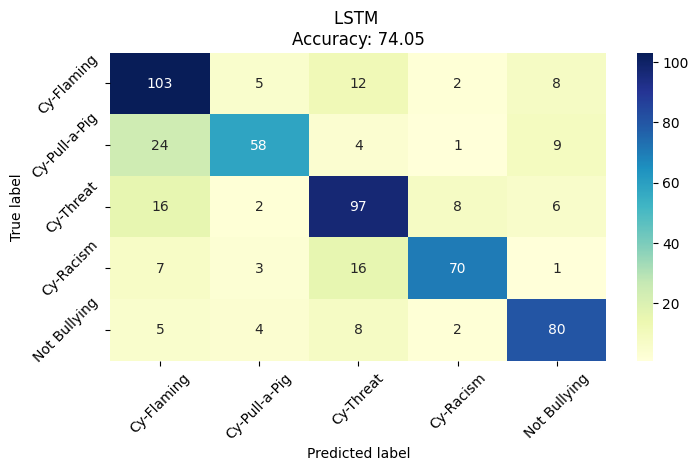

In [ ]:
#generate confusion matrix
from sklearn.metrics import confusion_matrix
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

# cm = confusion_matrix(y_testt, y_pred, labels=['Cy-Flaming', 'Cy-Pull-a-Pig', 'Cy-Threat', 'Cy-Racism', 'Not Bullying'])
# print(cm)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Cy-Flaming' ,'Cy-Pull-a-Pig', 'Cy-Threat','Cy-Racism','Not Bullying'], 
                     columns = ['Cy-Flaming' ,'Cy-Pull-a-Pig', 'Cy-Threat','Cy-Racism','Not Bullying'],)

plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
plt.title('LSTM \nAccuracy: {0:.2f}'.format(accuracy_score(y_true, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#ROC

18/18 [==============================] - 0s 19ms/step


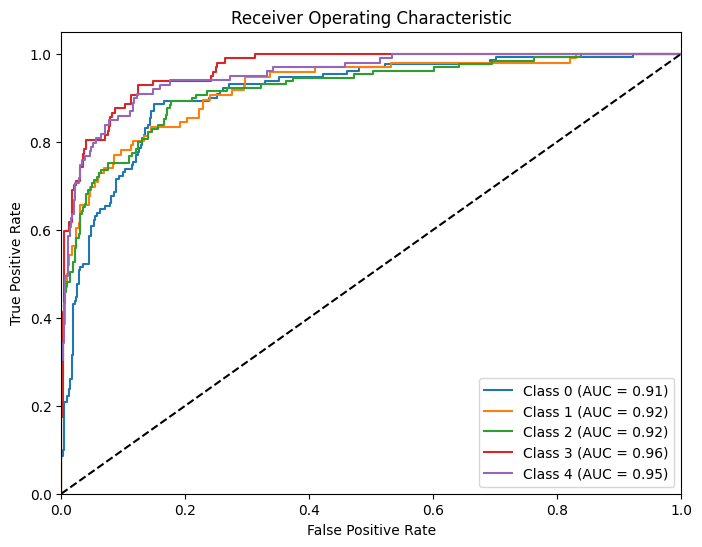

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], thresholds = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
